In [1]:
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from scipy.stats import zscore
import scanpy as sc
import pandas as pd

from vid import draw

## Load Data

### 6 dags

In [2]:
with open("./data/graphs/dags/removed_genes-1e_6-0.pkl", 'rb') as file:
	dag0 = pickle.load(file)
order0 = list(nx.topological_sort(dag0))

with open("./data/graphs/dags/removed_genes-1e_6-1.pkl", 'rb') as file:
	dag1 = pickle.load(file)
order1 = list(nx.topological_sort(dag1))

with open("./data/graphs/dags/removed_genes-1e_6-2.pkl", 'rb') as file:
	dag2 = pickle.load(file)
order2 = list(nx.topological_sort(dag2))

with open("./data/graphs/dags/removed_genes-1e_6-3.pkl", 'rb') as file:
	dag3 = pickle.load(file)
order3 = list(nx.topological_sort(dag3))

with open("./data/graphs/dags/removed_genes-1e_4-0.pkl", 'rb') as file:
	dag4 = pickle.load(file)
order4 = list(nx.topological_sort(dag4))

with open("./data/graphs/dags/estimated_dag.pkl", 'rb') as file:
	dag5 = pickle.load(file)
order5 = list(nx.topological_sort(dag5))

### 36 genes and ctrl cells

In [3]:
with open("./data/gene_dict.pkl", 'rb') as file:
	gene_dict = pickle.load(file)

obs_samples = np.load("./data/samples/ctrl.npy")

# # impute zero with mean
# imputer = SimpleImputer(missing_values=0, strategy='mean')
# obs_samples_imputed = imputer.fit_transform(obs_samples.T).T

## Linear Regression over Parents

In [4]:
responses = []
r_scores= [{}, {}, {}, {}, {}, {}]
# r_scores_imputed = []
# r_scores_non_zero = []

for i, order in enumerate([order0, order1, order2, order3, order4, order5]):
	r_score = r_scores[i]
	dag = [dag0, dag1, dag2, dag3, dag4, dag5][i]
	for gene in order:
		gene_parents = list(dag.predecessors(gene))

		if len(gene_parents) != 0:
			if gene not in responses:
				responses.append(gene)

			X = obs_samples[[gene_dict[i] for i in gene_parents], :].T
			y = obs_samples[gene_dict[gene], :].reshape(-1)
			reg = LinearRegression().fit(X, y)
			r_score[gene] = reg.score(X,y)**0.5

			# X = obs_samples_imputed[[gene_dict[i] for i in gene_parents], :].T
			# y = obs_samples_imputed[gene_dict[gene], :].reshape(-1)
			# reg = LinearRegression().fit(X, y)
			# r_scores_imputed.append(reg.score(X,y)**0.5)

			# idx = np.where(np.prod(obs_samples[[gene_dict[i] for i in gene_parents+[gene]], :], axis=0)>0)[0]
			# X = obs_samples[[gene_dict[i] for i in gene_parents], :].T
			# y = obs_samples[gene_dict[gene], :].reshape(-1)
			# reg = LinearRegression().fit(X[idx], y[idx])
			# r_scores_non_zero.append(reg.score(X[idx], y[idx])**0.5)

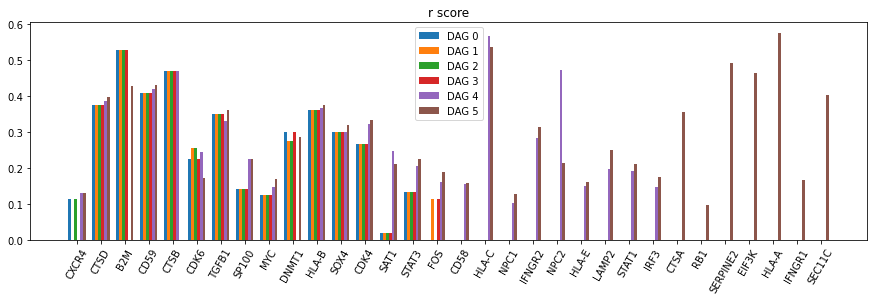

In [5]:
plt.figure(figsize=(15,4))


xaxis = np.arange(len(responses))
plt.bar(xaxis-0.3, [r_scores[0][r] if r in r_scores[0].keys() else 0 for r in responses], width=0.12, label='DAG 0')
plt.bar(xaxis-0.18, [r_scores[1][r] if r in r_scores[1].keys() else 0 for r in responses], width=0.12, label='DAG 1')
plt.bar(xaxis-0.06, [r_scores[2][r] if r in r_scores[2].keys() else 0 for r in responses], width=0.12, label='DAG 2')
plt.bar(xaxis+0.06, [r_scores[3][r] if r in r_scores[3].keys() else 0 for r in responses], width=0.12, label='DAG 3')
plt.bar(xaxis+0.18, [r_scores[4][r] if r in r_scores[4].keys() else 0 for r in responses], width=0.12, label='DAG 4')
plt.bar(xaxis+0.3, [r_scores[5][r] if r in r_scores[5].keys() else 0 for r in responses], width=0.12, label='DAG 5')
# plt.bar(xaxis-0.3, r_scores, width=0.3, label='raw')
# plt.bar(xaxis, r_scores_imputed, width=0.3, label='imputed')
# plt.bar(xaxis+0.3, r_scores_non_zero, width=0.3, label='nonzero')

plt.xticks(xaxis, responses, rotation=60)
plt.title('r score')
plt.legend()

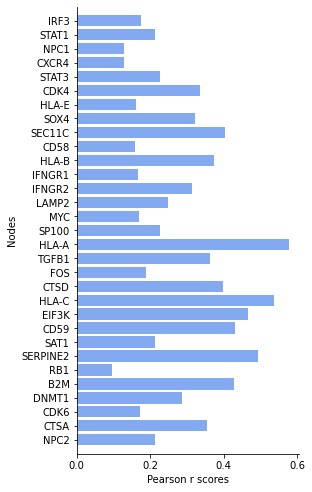

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4.5,7))
plt.rcParams.update({'font.size': 12})

plt.barh(list(r_scores[5].keys()), list(r_scores[5].values()), color='cornflowerblue', alpha=0.8)
plt.ylim(-1,31)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.xlabel('Pearson r scores')
plt.ylabel('Nodes')
plt.tight_layout()
plt.savefig('fig/r_score.pdf')

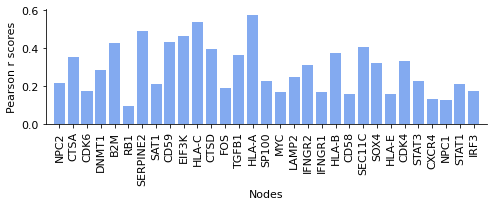

In [13]:
fig, ax = plt.subplots(1,1,figsize=(7,3))
plt.rcParams.update({'font.size': 11})

plt.bar(list(r_scores[5].keys()), list(r_scores[5].values()), color='cornflowerblue', alpha=0.8)
plt.xticks(rotation=90)
plt.xlim(-1,31)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.ylabel('Pearson r scores')
plt.xlabel('Nodes')
plt.tight_layout()
plt.savefig('fig/r_score_rotate.pdf')

In [6]:
r_scores[5]

{'NPC2': 0.21414241991416944,
 'CTSA': 0.3543507476517723,
 'CDK6': 0.17157754738205924,
 'DNMT1': 0.285131068080188,
 'B2M': 0.4284774406445899,
 'RB1': 0.0971649172929371,
 'SERPINE2': 0.49239893240282323,
 'SAT1': 0.2119941902226011,
 'CD59': 0.4301389362624405,
 'EIF3K': 0.4646708089158686,
 'HLA-C': 0.5354434777564824,
 'CTSD': 0.3973122505879966,
 'FOS': 0.1879656586369997,
 'TGFB1': 0.3613852260948689,
 'HLA-A': 0.5756410808550364,
 'SP100': 0.225474740105946,
 'MYC': 0.16941571308870662,
 'LAMP2': 0.24870924812198508,
 'IFNGR2': 0.3136382510003383,
 'IFNGR1': 0.1667026672926546,
 'HLA-B': 0.37385398865775604,
 'CD58': 0.1580141185411976,
 'SEC11C': 0.40375231153704616,
 'SOX4': 0.3203580221911661,
 'HLA-E': 0.1608694961778516,
 'CDK4': 0.33457426255521044,
 'STAT3': 0.22597280438090314,
 'CXCR4': 0.12954322359660578,
 'NPC1': 0.1276141705095314,
 'STAT1': 0.21235096671322806,
 'IRF3': 0.17622591549296038}

## Example: response = 'RB1'

In [6]:
print("genes with single parent node:")
for gene in order:
	gene_parents = list(dag.predecessors(gene))
	if len(gene_parents) == 1:
		print(gene + ' <- ' + gene_parents[0])

genes with single parent node:
NPC2 <- CTSB
CDK6 <- NPC2
RB1 <- DNMT1


Text(0.5, 1.0, 'Random\nPearson r=0.020851432676700792')

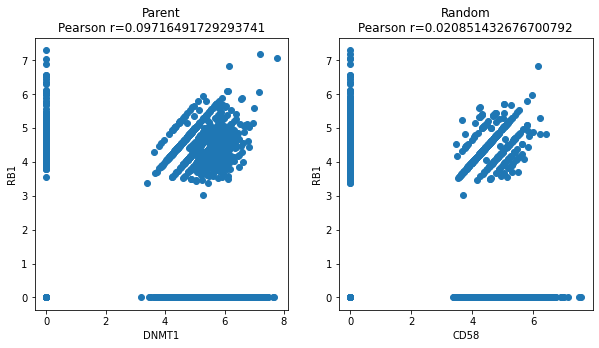

In [7]:
gene = 'RB1'
p_gene = 'DNMT1'
rd_gene = 'CD58'


x = obs_samples[gene_dict[p_gene], :].reshape(-1)
y = obs_samples[gene_dict[gene], :].reshape(-1)
z = obs_samples[gene_dict[rd_gene], :].reshape(-1)

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].scatter(x, y)
axs[0].set_ylabel(gene)
axs[0].set_xlabel(p_gene)
axs[0].set_title(f"Parent\nPearson r={pearsonr(x, y)[0]}")


axs[1].scatter(z, y)
axs[1].set_ylabel(gene)
axs[1].set_xlabel(rd_gene)
axs[1].set_title(f"Random\nPearson r={pearsonr(z, y)[0]}")


In [8]:
pearson_rs = np.eye(36)
pearson_ps = np.zeros((36,36))

from itertools import combinations
for i, j in combinations(range(36), 2):
	r, p = pearsonr(
		obs_samples[i,:],
		obs_samples[j, :]
	)
	pearson_rs[i, j] = r
	pearson_rs[j, i] = r
	pearson_ps[i, j] = p
	pearson_ps[j, i] = p

## Correlation between Genes

Text(0.5, 1.0, 'r2')

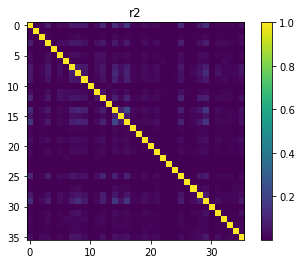

In [9]:
plt.imshow(pearson_rs**2)
plt.colorbar()
plt.title('r2')

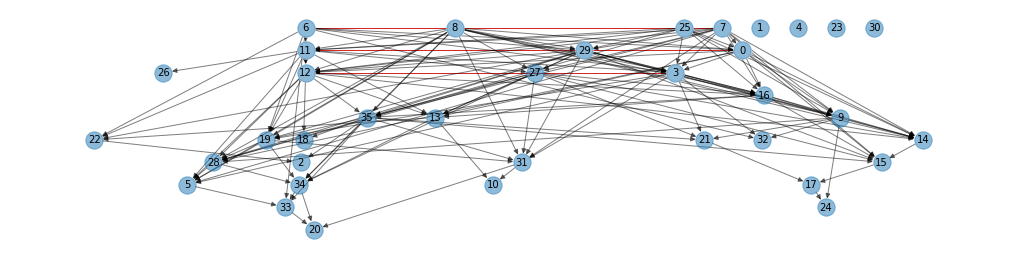

In [30]:
from causaldag import rand, partial_correlation_suffstat, partial_correlation_test, MemoizedCI_Tester, gsp, PDAG, DAG
from importlib import reload
import vid
reload(vid)

vid.draw(DAG.from_nx(dag5).rename_nodes(gene_dict).cpdag())

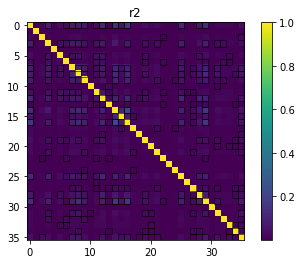

In [26]:
def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

plt.imshow(pearson_rs**2)
plt.colorbar()
plt.title('r2')

for edge in dag5.edges:
	i = gene_dict[edge[0]]
	j = gene_dict[edge[1]]
	highlight_cell(i,j, color='black', linewidth=1, alpha=0.6)
	highlight_cell(j,i, color='black', linewidth=1, alpha=0.6)

plt.show()

In [27]:
# plt.imshow(pearson_ps)
# plt.colorbar()
# plt.title('P values')

## Bigscale

### read data

In [31]:
df = pd.DataFrame(obs_samples.T, dtype=np.float32)
df.columns = gene_dict.keys()
adata_new = sc.AnnData(df)

/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/home/vzhang/miniconda3/envs/ptbctseq/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


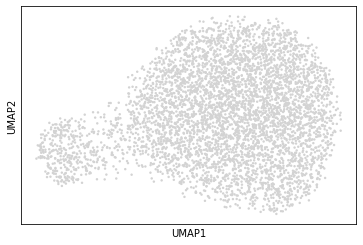

In [32]:
sc.pp.neighbors(adata_new, n_neighbors=30)
sc.tl.umap(adata_new)
sc.pl.umap(adata_new)

### louvain clusters

Number of louvain clusters: 68


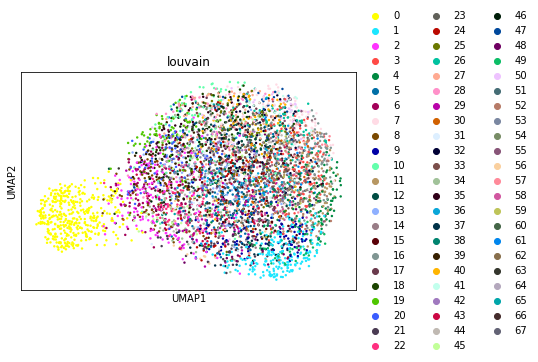

In [179]:
sc.tl.louvain(adata_new, resolution=4)
print(f"Number of louvain clusters: {len(adata_new.obs['louvain'].values.unique())}")

sc.pl.umap(adata_new, color="louvain") #legend_loc='on data')

In [180]:
print("Number of cells in each meta cell:")
adata_new.obs['louvain'].value_counts()

Number of cells in each meta cell:


0     414
1     227
2     131
3     126
4     122
     ... 
63     28
64     26
65     20
66     12
67      7
Name: louvain, Length: 68, dtype: int64

In [181]:
# sc.pl.clustermap(adata_new, obs_keys='louvain')

### meta cell statistics

In [182]:
cluster_mean = []
cluster_std = []
cluster_mean_adjusted = []

for i,c in enumerate(adata_new.obs['louvain'].values.unique()):
	# if i not in [8,11,13]:
	c_exp = adata_new[adata_new.obs['louvain']==c].X
	cluster_mean.append(c_exp.mean(axis=0))
	cluster_std.append(c_exp.std(axis=0))
	cluster_mean_adjusted.append(c_exp.mean(axis=0)/np.maximum(c_exp.std(axis=0), 0.001))

cluster_mean = np.array(cluster_mean).T
cluster_std = np.array(cluster_std).T
cluster_mean_adjusted = np.array(cluster_mean_adjusted).T

In [183]:
pairwise_zscore = []

for i in range(36):
	x_m = cluster_mean[i, :]
	x_std = cluster_std[i, :]
	x_zscore = [(x_m[k]-x_m[j])/((np.maximum(x_std[k]*x_std[j],0.001)**0.5)) for k,j in combinations(range(len(x_m)), 2)]
	pairwise_zscore.append(x_zscore)

pairwise_zscore = np.array(pairwise_zscore)

### linearity

Text(0, 0.5, 'CD59')

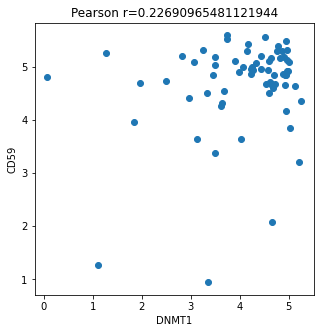

In [184]:
gene = 'CD59'
p_gene = 'DNMT1'

x = cluster_mean[gene_dict[p_gene], :]
y = cluster_mean[gene_dict[gene], :]

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.title(f"Pearson r={pearsonr(x,y)[0]}")
plt.xlabel(p_gene)
plt.ylabel(gene)

In [185]:
[adata_new.obs['louvain'].values.unique()[i] for i in np.where(y<3)]

[['0', '2', '60']
 Categories (68, object): ['0', '1', '2', '3', ..., '64', '65', '66', '67']]

Text(0, 0.5, 'CD59')

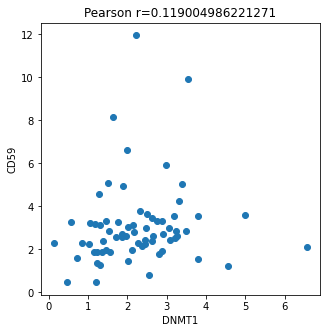

In [186]:
gene = 'CD59'
p_gene = 'DNMT1'

x = cluster_mean_adjusted[gene_dict[p_gene], :]
y = cluster_mean_adjusted[gene_dict[gene], :]

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.title(f"Pearson r={pearsonr(x,y)[0]}")
plt.xlabel(p_gene)
plt.ylabel(gene)

Text(0, 0.5, 'CD59')

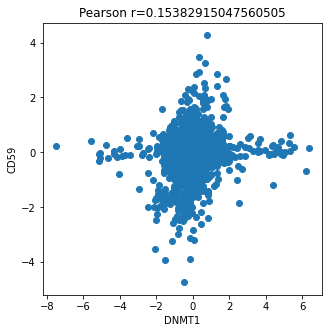

In [187]:
x_zscore = pairwise_zscore[gene_dict[p_gene], :]
y_zscore = pairwise_zscore[gene_dict[gene], :]

plt.figure(figsize=(5,5))
plt.scatter(x_zscore, y_zscore)
plt.title(f"Pearson r={pearsonr(x_zscore,y_zscore)[0]}")
plt.xlabel(p_gene)
plt.ylabel(gene)

### correlation between genes

In [188]:
cluster_pearson_rs = np.eye(36)
cluster_pearson_ps = np.zeros((36,36))

from itertools import combinations
for i, j in combinations(range(36), 2):
	r, p = pearsonr(
		cluster_mean_adjusted[i,:],
		cluster_mean_adjusted[j, :]
	)
	cluster_pearson_rs[i, j] = r
	cluster_pearson_rs[j, i] = r
	cluster_pearson_ps[i, j] = p
	cluster_pearson_ps[j, i] = p

Text(0.5, 1.0, 'r2')

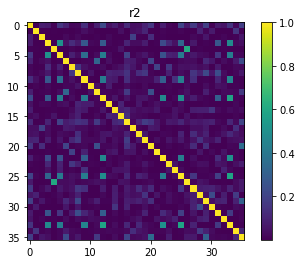

In [189]:
plt.imshow(cluster_pearson_rs**2)
plt.colorbar()
plt.title('r2')

In [190]:
# plt.imshow(cluster_pearson_ps)
# plt.colorbar()
# plt.title('p values')

### learning dags

In [191]:
import warnings
warnings.filterwarnings('ignore')

In [192]:
import random
from causaldag import rand, partial_correlation_suffstat, partial_correlation_test, MemoizedCI_Tester, gsp, PDAG, DAG
# from causaldag import kci_test

random.seed(149)
np.random.seed(149)
suffstat = partial_correlation_suffstat(cluster_mean_adjusted.T)
ci_tester = MemoizedCI_Tester(partial_correlation_test, suffstat, alpha=1e-3)
est_dag = gsp(set(range(36)), ci_tester, nruns=100)

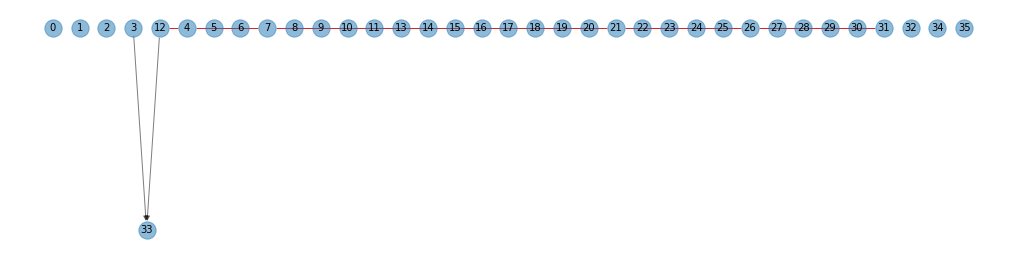

In [193]:
from importlib import reload
import vid
reload(vid)

vid.draw(est_dag.cpdag())

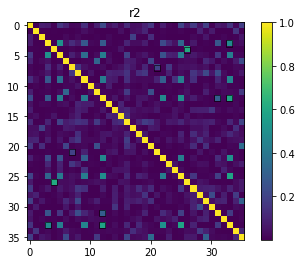

In [194]:
def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

plt.imshow(cluster_pearson_rs**2)
plt.colorbar()
plt.title('r2')

for i,j in est_dag.arcs:
	highlight_cell(i,j, color='black', linewidth=1, alpha=0.6)
	highlight_cell(j,i, color='black', linewidth=1, alpha=0.6)

plt.show()

In [195]:
est_dag_s = est_dag.rename_nodes({gene_dict[i]:i for i in gene_dict.keys()})
with open("./data/graphs/pdags/bigscale_res4e-1.pkl", 'wb') as f:
	pickle.dump(est_dag_s.cpdag(), f)

In [74]:
# draw(DAG.from_nx(dag).rename_nodes(gene_dict).cpdag())

In [ ]:
cluster_pearson_rs = np.eye(36)
cluster_pearson_ps = np.zeros((36,36))

from itertools import combinations
for i, j in combinations(range(36), 2):
	r, p = pearsonr(
		obs_samples[i,:],
		obs_samples[j, :]
	)
	pearson_rs[i, j] = r
	pearson_rs[j, i] = r
	pearson_ps[i, j] = p
	pearson_ps[j, i] = p